In [1]:
# !conda install xgboost
# 

#!pip install numpy pandas matplotlib seaborn xgboost scikit-learn 



In [2]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
# import pickle

In [3]:
df0 = pd.read_csv("/Users/emilneacsu/Desktop/Disertatie/Jupyter/concatenated_data.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,37736,Rental unit in Brez,162348,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,46.43561,11.10380,Entire rental unit,4,2 baths,1.0,$157.00,7,365,t,0,0,0,0,99,26/09/2010,10/12/2023,4.87,4.91,4.95,4.90,4.85,4.61,4.84,f,0.61
1,138917,Condo in Madonna di,677905,Mirko Ian,08/06/2011,Switzerland,within a few hours,0.90,0.47,f,1,1,"['email', 'phone', 'work_email']",t,t,46.22332,10.82495,Entire condo,6,1 bath,4.0,$400.00,2,1125,t,8,12,12,224,43,24/08/2011,21/12/2023,4.67,4.67,4.74,4.76,4.90,4.45,4.43,f,0.29
2,299464,Condo in Riva del Ga,1543124,Cristiano,28/12/2011,"Riva del Garda, Italy",within an hour,1.00,0.93,t,11,11,"['email', 'phone']",t,t,45.90883,10.84660,Entire condo,3,1 bath,2.0,$116.00,3,1125,t,20,20,49,263,1,02/01/2022,02/01/2022,5.00,5.00,5.00,5.00,5.00,4.00,4.00,t,0.04
3,398211,Rental unit in Brez,162348,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,46.43360,11.10194,Entire rental unit,10,2 baths,5.0,$386.00,5,1125,t,24,47,75,340,49,05/10/2012,01/09/2023,4.88,4.90,4.86,4.96,4.98,4.43,4.84,f,0.36
4,398249,Rental unit in Brez,162348,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,46.43542,11.10185,Entire rental unit,4,1 bath,1.0,$115.00,5,1125,t,0,0,0,0,59,19/05/2012,01/10/2023,4.92,4.91,4.93,5.00,4.96,4.74,4.89,f,0.42


In [4]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'bathrooms_text' with the actual name of your column if it's different

# Extract numeric part from the 'bathrooms_text' column
df0['bathrooms'] = df0['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Now df['bathrooms'] is a numeric column with the number of bathrooms.


In [5]:
df0=df0.dropna()

In [6]:
# Gather basic information about the data
### YOUR CODE HERE ### 
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316201 entries, 0 to 420922
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           316201 non-null  int64  
 1   name                         316201 non-null  object 
 2   host_id                      316201 non-null  int64  
 3   host_name                    316201 non-null  object 
 4   host_since                   316201 non-null  object 
 5   host_location                316201 non-null  object 
 6   host_response_time           316201 non-null  object 
 7   host_response_rate           316201 non-null  float64
 8   host_acceptance_rate         316201 non-null  float64
 9   host_is_superhost            316201 non-null  object 
 10  host_listings_count          316201 non-null  int64  
 11  host_total_listings_count    316201 non-null  int64  
 12  host_verifications           316201 non-null  object 
 13  host

In [7]:
df0 = df0.drop(['id', 'name','host_id','latitude','longitude','bathrooms_text'], axis=1)

In [8]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df0.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms
count,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.000000,316201.00000,316201.000000
mean,0.961119,0.897845,42.129921,66.125329,3.979576,2.417886,5.914766,531.881620,12.617819,29.227482,47.335723,184.628353,52.472541,4.749968,4.783698,4.737189,4.834903,4.842029,4.784839,4.669941,1.53756,1.419089
std,0.140459,0.195674,245.156765,395.403270,2.511876,1.930702,19.062175,1444.730588,10.931128,22.392205,33.719248,130.308964,86.621232,0.373758,0.360138,0.390058,0.327116,0.333798,0.321222,0.404024,1.68545,0.849781
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01000,0.000000
25%,1.000000,0.900000,1.000000,2.000000,2.000000,1.000000,1.000000,60.000000,0.000000,3.000000,9.000000,62.000000,5.000000,4.670000,4.740000,4.660000,4.810000,4.830000,4.710000,4.580000,0.37000,1.000000
50%,1.000000,0.990000,3.000000,4.000000,4.000000,2.000000,2.000000,365.000000,12.000000,32.000000,55.000000,179.000000,19.000000,4.860000,4.890000,4.860000,4.930000,4.950000,4.880000,4.770000,1.00000,1.000000
75%,1.000000,1.000000,13.000000,18.000000,5.000000,3.000000,3.000000,1125.000000,23.000000,51.000000,79.000000,317.000000,60.000000,4.990000,5.000000,4.990000,5.000000,5.000000,5.000000,4.900000,2.15000,2.000000
max,1.000000,1.000000,4883.000000,9722.000000,16.000000,150.000000,1125.000000,767533.000000,30.000000,60.000000,90.000000,365.000000,3501.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.330000,5.000000,61.38000,49.000000


In [9]:
# Assuming 'price' is the name of the column in your DataFrame 'df'
# This will replace the dollar sign with nothing
df0['price'] = df0['price'].str.replace('$', '')

# Convert the 'price' column to a numeric type (float)
df0['price'] = pd.to_numeric(df0['price'], errors='coerce')


In [10]:
df0=df0.dropna()

In [11]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
property_type                  0
accommodates                   0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_sco

In [12]:
#df0.to_csv('C:/Users/UserXp/Desktop/Disertatie/date/date_df0.csv', index=False)

In [13]:
df0["instant_bookable"].value_counts()

instant_bookable
f    167975
t    103556
Name: count, dtype: int64

In [14]:
df0['price'].describe()

count    271531.000000
mean        195.781712
std         186.765379
min           5.000000
25%          80.000000
50%         129.000000
75%         230.000000
max         999.000000
Name: price, dtype: float64

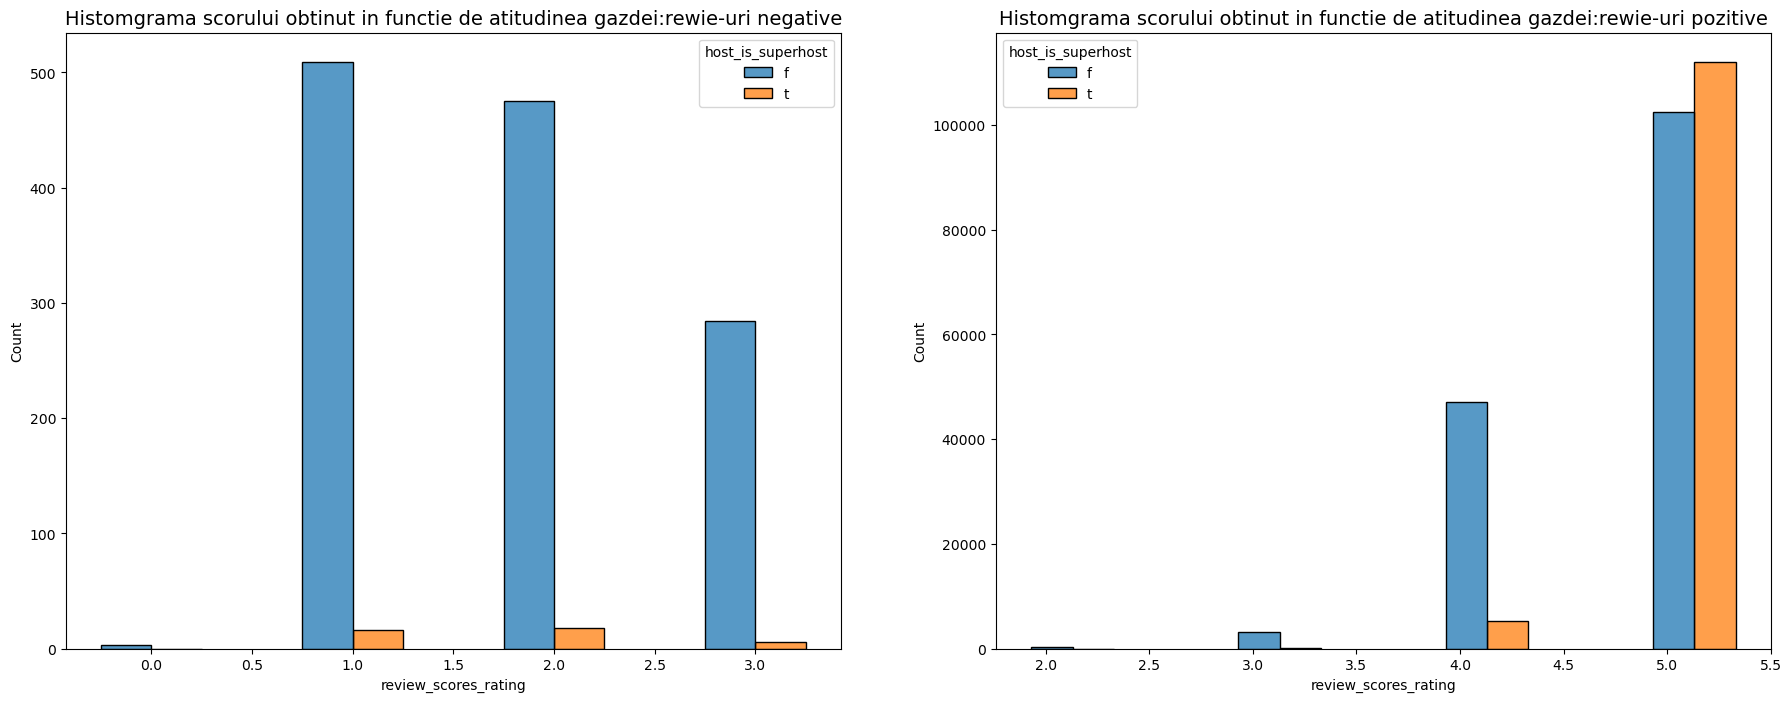

In [15]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df0[df0['review_scores_rating'] < 3]

# Define long-tenured employees
tenure_long = df0[df0['review_scores_rating'] > 2]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='review_scores_rating', hue='host_is_superhost', discrete=1, 
             hue_order=['f', 't'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Histomgrama scorului obtinut in functie de atitudinea gazdei:rewie-uri negative',size='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='review_scores_rating', hue='host_is_superhost', discrete=1, 
             hue_order=['f', 't'],multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Histomgrama scorului obtinut in functie de atitudinea gazdei:rewie-uri pozitive', fontsize='14');

host_name                       object
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_listings_count              int64
host_total_listings_count        int64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
property_type                   object
accommodates                     int64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
has_availability                object
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
first_review                    object
last_review              

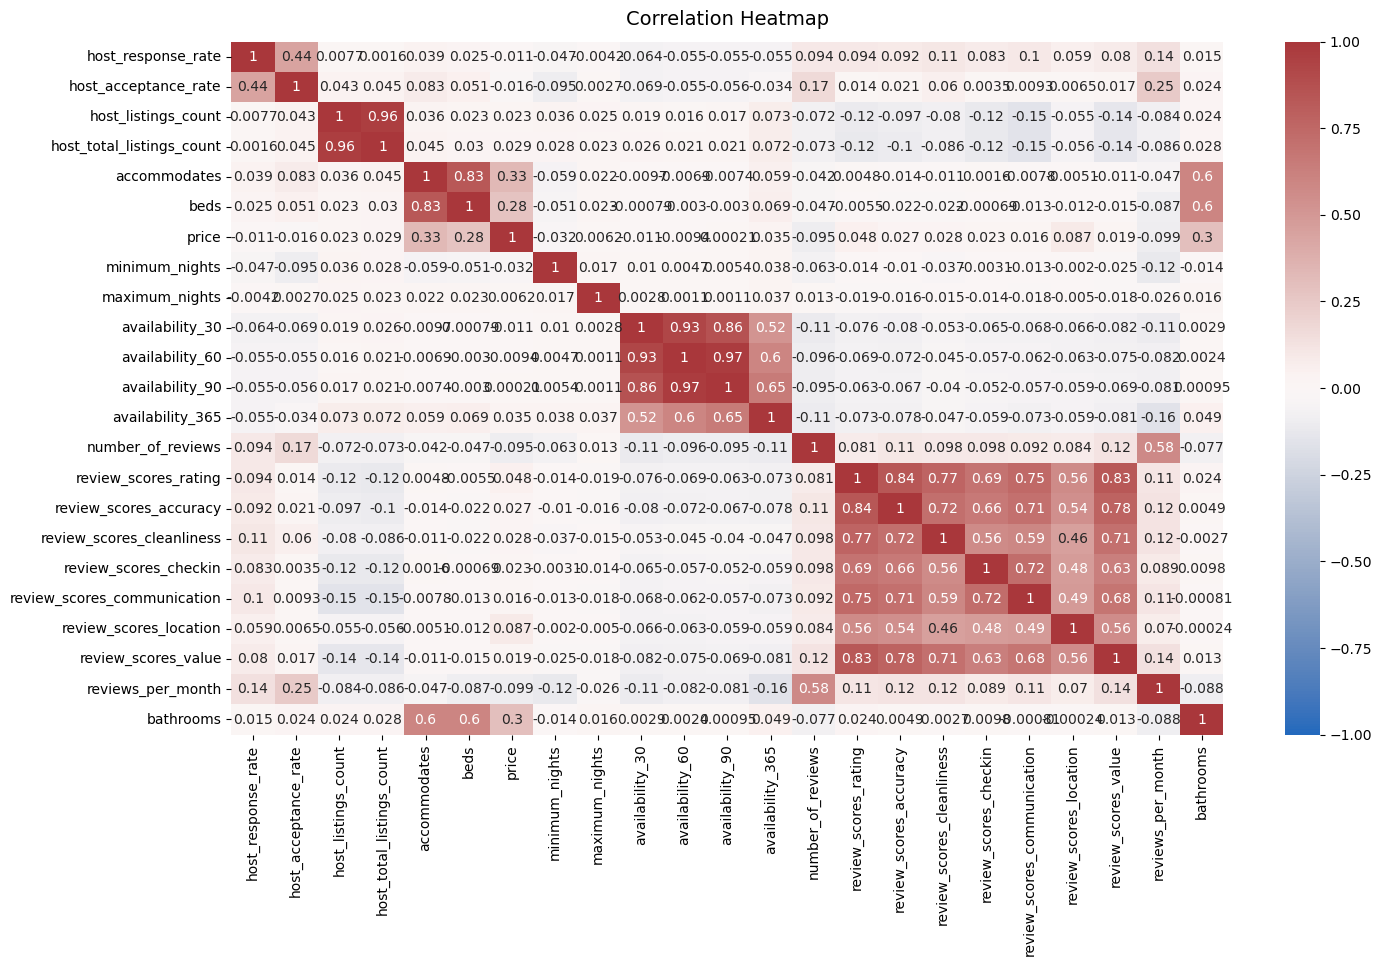

In [16]:
# Inspect data types
print(df0.dtypes)

# Select only numeric columns for correlation
numeric_df0 = df0.select_dtypes(include=[np.number])

# If needed, convert columns to numeric, forcing non-convertible values to NaN
# df0['some_column'] = pd.to_numeric(df0['some_column'], errors='coerce')

# Now you can safely calculate the correlation matrix
correlation_matrix = numeric_df0.corr()

# Then create your heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()


In [17]:
#!pip install statsmodels


In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df0' is your initial DataFrame
df1 = df0.copy()

In [19]:
# Convert 'host_is_superhost' to a binary numeric variable (1 for 't', 0 for 'f')
df1['host_is_superhost_categ'] = df1['host_is_superhost'].map({'t': 1, 'f': 0})
df1['host_identity_verified_categ'] = df1['host_identity_verified'].map({'t': 1, 'f': 0})
df1['instant_bookable_categ'] = df1['instant_bookable'].map({'t': 1, 'f': 0})



# Set a random seed for reproducibility
seed = 88

In [20]:
# Split the data into a training set and a test set with 75% training data and 25% testing data
train_data, test_data = train_test_split(df1, test_size=0.25, random_state=seed, stratify=df1['host_is_superhost_categ'])

# Select features and target for the training set
X_train = train_data[['beds', 'number_of_reviews', 'review_scores_value','availability_365','bathrooms'
                      ,'host_identity_verified_categ','instant_bookable_categ','host_response_rate']]
y_train = train_data['host_is_superhost_categ']

# Add a constant to the predictor variables to represent the intercept
X_train = sm.add_constant(X_train)

# Fill or drop NA values in the training set
X_train.fillna(X_train.mean(), inplace=True)

# Build and fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.593449
         Iterations 7


In [21]:
# Print the summary of the model
print(result.summary())

                              Logit Regression Results                             
Dep. Variable:     host_is_superhost_categ   No. Observations:               203648
Model:                               Logit   Df Residuals:                   203639
Method:                                MLE   Df Model:                            8
Date:                     Thu, 23 May 2024   Pseudo R-squ.:                  0.1326
Time:                             15:30:58   Log-Likelihood:            -1.2085e+05
converged:                            True   LL-Null:                   -1.3933e+05
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -16.7851      0.138   -121.685      0.000     -17.055     -16.515
beds                             0.00

In [22]:
# Calculate and print the odds ratios
odds_ratios = np.exp(result.params)
print(odds_ratios)


const                           5.132458e-08
beds                            1.008964e+00
number_of_reviews               1.005347e+00
review_scores_value             9.805809e+00
availability_365                9.997374e-01
bathrooms                       1.037903e+00
host_identity_verified_categ    1.568734e+00
instant_bookable_categ          8.909591e-01
host_response_rate              1.772146e+02
dtype: float64


In [23]:
# Prepare the test set in the same way as the training set
X_test = test_data[['beds', 'number_of_reviews', 'review_scores_value','availability_365','bathrooms',
                    'host_identity_verified_categ','instant_bookable_categ','host_response_rate']]
X_test = sm.add_constant(X_test)
X_test.fillna(X_test.mean(), inplace=True)
y_test = test_data['host_is_superhost_categ']

# Make predictions with the test set
estimat = result.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, estimat)
roc_auc = auc(fpr, tpr)

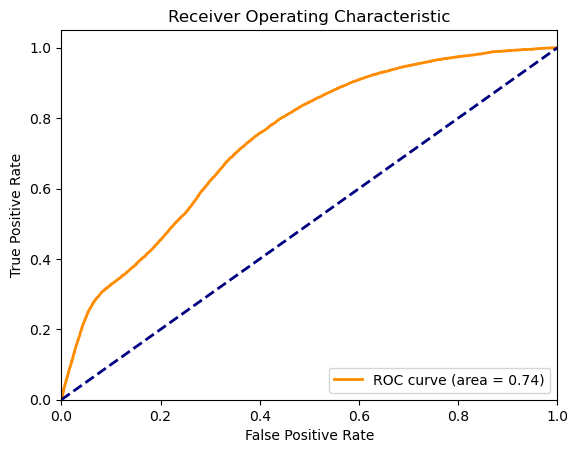

In [24]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

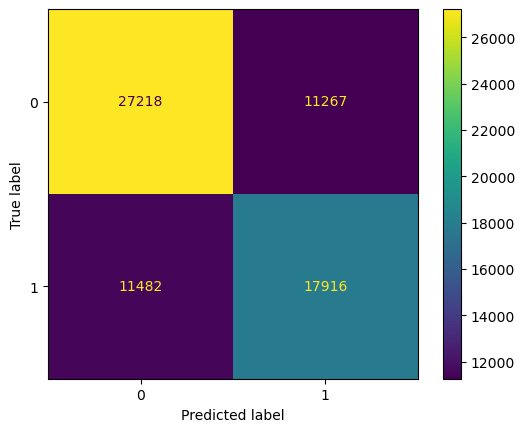

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'estimat' contains predicted probabilities, you'll need to convert these to binary predictions.
# You need to choose a threshold for this conversion. Common practice is to use 0.5 for binary outcomes.
y_pred = [1 if x >= 0.5 else 0 for x in estimat]

# Now compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot(values_format='d')  # 'd' means integer formatting

# Display plot
plt.show()

In [26]:
from sklearn.metrics import classification_report

# Assuming 'estimat' contains predicted probabilities and 'y_test' contains true labels
# Convert probabilities to binary predictions (using 0.5 as the threshold)
y_pred = [1 if e >= 0.5 else 0 for e in estimat]

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Predicted is a super host', 'Predicted is not a super host'])

print(report)


                               precision    recall  f1-score   support

    Predicted is a super host       0.70      0.71      0.71     38485
Predicted is not a super host       0.61      0.61      0.61     29398

                     accuracy                           0.66     67883
                    macro avg       0.66      0.66      0.66     67883
                 weighted avg       0.66      0.66      0.66     67883



In [27]:
#regresie liniara (nu pun)

In [28]:
df_ln = df0[['price','beds', 'number_of_reviews', 'review_scores_value','availability_365','bathrooms'
             ,'host_response_rate','reviews_per_month']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = numeric_df0.drop('price', axis=1)
y = numeric_df0['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 111.49193809276657
Mean Squared Error: 29269.59636587556
R^2 Score: 0.1547047761590412


In [30]:
# After training the model
coefficients = model.coef_
intercept = model.intercept_

# Assuming X_train has the same column names as your original dataframe
feature_names = X_train.columns

# Building the equation string
equation = "Price = {:.2f}".format(intercept)
for name, coef in zip(feature_names, coefficients):
    equation += " + {:.2f} * {}".format(coef, name)

print("Regression Equation:", equation)


Regression Equation: Price = -112.21 + -12.28 * host_response_rate + -20.56 * host_acceptance_rate + -0.02 * host_listings_count + 0.02 * host_total_listings_count + 21.26 * accommodates + -6.18 * beds + -0.27 * minimum_nights + -0.00 * maximum_nights + 0.25 * availability_30 + -1.69 * availability_60 + 1.00 * availability_90 + -0.00 * availability_365 + -0.09 * number_of_reviews + 36.51 * review_scores_rating + -7.84 * review_scores_accuracy + 7.34 * review_scores_cleanliness + -8.27 * review_scores_checkin + -12.98 * review_scores_communication + 62.85 * review_scores_location + -29.34 * review_scores_value + -5.43 * reviews_per_month + 37.72 * bathrooms


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df_ln.drop('price', axis=1)
y = df_ln['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 115.6938218108455
Mean Squared Error: 30453.30085282603
R^2 Score: 0.12051982407596806


In [32]:
# After training the model
coefficients = model.coef_
intercept = model.intercept_

# Assuming X_train has the same column names as your original dataframe
feature_names = X_train.columns

# Building the equation string
equation = "Price = {:.2f}".format(intercept)
for name, coef in zip(feature_names, coefficients):
    equation += " + {:.2f} * {}".format(coef, name)

print("Regression Equation:", equation)


Regression Equation: Price = 49.35 + 14.98 * beds + -0.11 * number_of_reviews + 14.87 * review_scores_value + 0.00 * availability_365 + 47.52 * bathrooms + -13.43 * host_response_rate + -4.42 * reviews_per_month


In [33]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming `X` contains the features and `y` contains the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')


In [34]:
#Random forest

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Presupunem că X_train și y_train sunt seturile de date pe care le-ați folosit pentru a antrena regresia logistică
# # Și trebuie să pregătiți setul de testare (X_test și y_test) în mod similar
# seed = 87
# # Antrenarea modelului de Random Forest
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=seed)  # Puteți ajusta hiperparametrii după cum este necesar
# result_rand=rf_clf.fit(X_train, y_train)

# # Facerea predicțiilor pe setul de testare
# rf_predictions = rf_clf.predict(X_test)

# # Evaluarea modelului
# print(classification_report(y_test, rf_predictions))
# print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")



In [36]:
# # Confusion matrix (dacă este necesar)
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# rf_cm = confusion_matrix(y_test, rf_predictions)
# rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
# rf_disp.plot()
# plt.show()


In [37]:
# from sklearn.ensemble import RandomForestClassifier

# # Assuming you have already defined and filled any missing values in X_train and y_train
# # and you have a predefined seed for reproducibility
# seed=88


# # Number of trees
# print(f"Number of trees in the forest: {len(rf_clf.estimators_)}")

# # Feature importances
# print("Feature importances:")
# for name, importance in zip(X_train.columns, rf_clf.feature_importances_):
#     print(f"{name}: {importance}")

# # You can also get information about the depth of each tree in the forest
# tree_depths = [tree.tree_.max_depth for tree in rf_clf.estimators_]
# print(f"Average depth of trees: {sum(tree_depths) / len(tree_depths)}")


In [38]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# seed=88
# # Get the predicted probabilities for the positive class (1)
# y_pred_probs = rf_clf.predict_proba(X_test)[:, 1]

# # Compute ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


In [39]:
# from sklearn.inspection import permutation_importance
# seed=88
# # Perform permutation importance
# perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=10, random_state=seed)

# # Plot Mean Decrease in Accuracy
# plt.figure(figsize=(10, 6))
# plt.title("Permutation Importance (Mean Decrease in Accuracy)")
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], color="b")
# plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.show()


In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# seed=88


# # Get feature importances
# importances = rf_clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
# indices = np.argsort(importances)[::-1]

# # Plot the feature importances of the forest
# plt.figure(figsize=(10, 6))
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()


In [41]:
#Arbore Random Forest

In [42]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# import matplotlib.pyplot as plt
# # Antrenarea modelului cu setul de date
# rf_clf.fit(X_train, y_train)

# # Alegeți un singur arbore din ansamblu
# chosen_tree = rf_clf.estimators_[0]


In [43]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Convert feature names from pandas Index object to a list
# feature_names_list = X_train.columns.tolist()

# # Vizualizați arborele cu matplotlib
# plt.figure(figsize=(20,10))
# tree.plot_tree(chosen_tree, 
#                feature_names=feature_names_list, 
#                class_names=['class1', 'class2'], 
#                filled=True, 
#                impurity=False, 
#                fontsize=14)
# plt.show()

In [44]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# import matplotlib.pyplot as plt

# # Construiește arborele de decizie cu parametrii de restricție
# # Ajustează parametrii în funcție de necesitățile tale
# clf = DecisionTreeClassifier(
#     criterion='gini',      # sau 'entropy' pentru câștigul de informație
#     max_depth=5,           # setează adâncimea maximă a arborelui
#     min_samples_split=20,  # numărul minim de eșantioane necesare pentru a împărți un nod intern
#     min_samples_leaf=10    # numărul minim de eșantioane necesare la o frunză
# )

# # Antrenează modelul pe datele de antrenament
# clf.fit(X_train, y_train)

# # Vizualizați arborele cu matplotlib
# plt.figure(figsize=(60, 30))
# tree.plot_tree(clf, 
#                feature_names=feature_names_list, 
#                class_names=['class1', 'class2'], 
#                filled=True, 
#                impurity=False, 
#                fontsize=10)  # poti ajusta marimea fontului dacă este nevoie
# plt.show()


##Decision Tree


In [45]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming 'df1' is your initial DataFrame
# df2 = df1.copy()

In [46]:
# import pandas as pd

# # Presupunem că df este DataFrame-ul dumneavoastră și 'coloana' este coloana pe care doriți să o clasificați
# # Înlocuiți 'coloana' cu numele real al coloanei pe care doriți să o modificați

# # Definiți intervalele și etichetele
# bins = [0, 9, 15, 50,100,500,1000,float('inf')]  # float('inf') este folosit pentru a include toate valorile peste 5000
# labels = ['<9', '<15', '<50','<100','<500','1000','>=1000']

# # Clasificați valorile folosind pd.cut()
# df2['number_of_reviews_categ'] = pd.cut(df2['number_of_reviews'], bins=bins, labels=labels, right=False)

# # Verificați rezultatele
# print(df2[['number_of_reviews', 'number_of_reviews_categ']])


In [47]:
# import pandas as pd

# # Presupunem că df este DataFrame-ul dumneavoastră și 'coloana' este coloana pe care doriți să o clasificați
# # Înlocuiți 'coloana' cu numele real al coloanei pe care doriți să o modificați

# # Definiți intervalele și etichetele
# bins = [0, 1, 2,3,4,4.25,4.5,4.75,float('inf')]  # float('inf') este folosit pentru a include toate valorile peste 5000
# labels = ['<1', '<2', '<3','<4','4.25','<4.5','<4.75','>=4.75']

# # Clasificați valorile folosind pd.cut()
# df2['review_scores_value_categ'] = pd.cut(df2['review_scores_value'], bins=bins, labels=labels, right=False)

# # Verificați rezultatele
# print(df2[['review_scores_value_categ', 'review_scores_value']])

In [48]:
# import pandas as pd

# # Presupunem că df este DataFrame-ul dumneavoastră și 'coloana' este coloana pe care doriți să o clasificați
# # Înlocuiți 'coloana' cu numele real al coloanei pe care doriți să o modificați

# # Definiți intervalele și etichetele
# bins = [0,5, 10, 50,100,150,200,float('inf')]  # float('inf') este folosit pentru a include toate valorile peste 5000
# labels = ['<5', '<10', '<50','<100','<150','<200','>=200']

# # Clasificați valorile folosind pd.cut()
# df2['availability_365_categ'] = pd.cut(df2['availability_365'], bins=bins, labels=labels, right=False)



# # Encode the `salary` column as an ordinal numeric category
# df2['salary'] = (
#     df2['availability_365_categ'].astype('category')
#     .cat.set_categories(['<5', '<10', '<50','<100','<150','<200','>=200'])
#     .cat.codes
# )
# # Verificați rezultatele
# print(df2[['availability_365_categ', 'availability_365']])


In [49]:
#Arbore vechi fara categorii

In [50]:
# from sklearn.tree import DecisionTreeClassifier

# # Create the Decision Tree classifier instance
# dt_clf = DecisionTreeClassifier(random_state=seed)

# # Fit the model to the training data
# dt_clf.fit(X_train, y_train)

# # Make predictions
# dt_predictions = dt_clf.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, dt_predictions))


In [51]:
# parameters = {
#     'max_depth': [2, 3, 4],  # Reducem adâncimea maximă pentru a simplifica arborele
#     'min_samples_split': [20, 40, 60],  # Creștem numărul minim de eșantioane pentru a diviza un nod intern
#     'min_samples_leaf': [10, 20, 30],  # Creștem numărul minim de eșantioane necesare la un nod frunză
#     'ccp_alpha': [0.0, 0.01, 0.02]  # Explorăm valori pentru pruning bazat pe cost-complexitate
# }

# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=seed), parameters, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Cele mai bune parametri găsiți:", grid_search.best_params_)
# best_dt_model = grid_search.best_estimator_
# best_dt_predictions = best_dt_model.predict(X_test)
# print(classification_report(y_test, best_dt_predictions))

In [52]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'max_depth': [None, 9, 4, 2],  # Adăugăm adâncimi mai mici pentru explorare
#     'min_samples_split': [3, 12, 25],  # Creștem numărul minim de eșantioane pentru divizare
#     'min_samples_leaf': [1, 7, 15],  # Creștem numărul minim de eșantioane pentru fiecare frunză
# }
# # Create the GridSearchCV object
# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=seed), parameters, cv=5, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print(grid_search.best_params_)

# # Use the best estimator to make predictions
# best_dt_predictions = grid_search.predict(X_test)

# # Evaluate the best model
# print(classification_report(y_test, best_dt_predictions))


In [53]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier

# # Set up the decision tree classifier
# # Assuming you have a variable 'seed' defined for random state
# dt_clf = DecisionTreeClassifier(random_state=seed)

# # Perform cross-validation
# auc_scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='roc_auc')

# # Print the AUC scores
# print("AUC scores for each fold are:", auc_scores)
# print("Average AUC score:", auc_scores.mean())


In [54]:
# print(X_train.head())

In [55]:
# X_train = X_train.rename(columns={'host_identity_verified_categ': 'host_verified'})
# X_train = X_train.rename(columns={'instant_bookable_categ': 'instant_bookable'})
# X_train = X_train.rename(columns={'host_response_rate': 'response_rate'})



In [56]:
#print(feature_names_list)

In [57]:
# # After performing grid search and fitting the model
# best_dt = grid_search.best_estimator_

# # Convert feature names from pandas Index object to a list
# feature_names_list = X_train.columns.tolist()

# # Now use this list to plot the tree
# plt.figure(figsize=(50, 30))  # Set the size of the figure (width, height)
# plot_tree(best_dt, 
#           filled=True, 
#           rounded=True, 
#           class_names=['Negative', 'Positive'],  # Replace with your actual class names
#           feature_names=feature_names_list)  # Use the converted list of feature names

# plt.title("Decision Tree Visualization")
# plt.show()



In [58]:
# from sklearn.tree import export_text

# # Export the structure of the tree to a text representation
# tree_rules = export_text(best_dt, feature_names=feature_names_list)

# # Display the rules of the tree
# print(tree_rules)


In [59]:
#PCA

In [60]:
X_trainPCA = df0[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','beds','price','minimum_nights','maximum_nights','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','bathrooms']]

In [61]:
X_trainPCA.dtypes

host_response_rate             float64
host_acceptance_rate           float64
host_listings_count              int64
host_total_listings_count        int64
accommodates                     int64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
reviews_per_month              float64
bathrooms                      float64
dtype: object

In [62]:
 X_trainPCA.fillna(X_trainPCA.mean(), inplace=True)


/var/folders/cj/z8gvqy0j4h78ffnzmdl0v0qh0000gn/T/ipykernel_72513/353103994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainPCA.fillna(X_trainPCA.mean(), inplace=True)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainPCA)


In [64]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [65]:
pca = PCA(n_components=10)  # Sau oricât doriți să păstrați
X_pca = pca.fit_transform(X_train_scaled)  # Aplicați PCA


In [66]:
print(f"Varianta explicată de fiecare componentă: {pca.explained_variance_ratio_}")
print(f"Varianta totală explicată: {np.sum(pca.explained_variance_ratio_)}")


Varianta explicată de fiecare componentă: [0.24028322 0.14365593 0.10646239 0.08955213 0.05840788 0.05451762
 0.05281305 0.04717557 0.04278573 0.0326663 ]
Varianta totală explicată: 0.8683198182826614


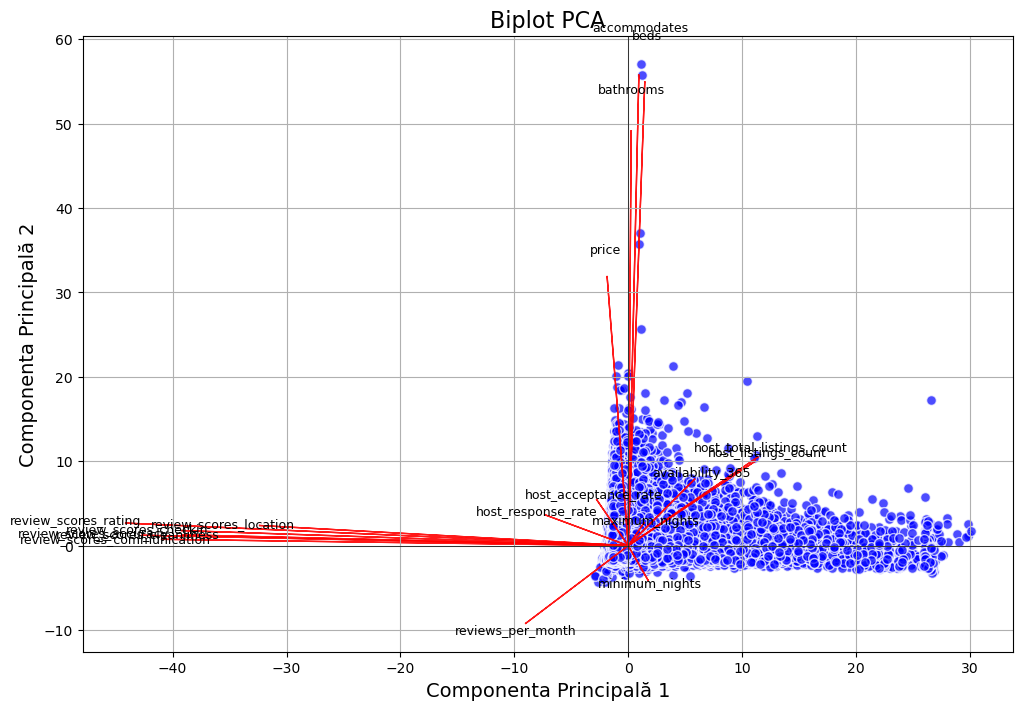

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Presupunem că 'df' este DataFrame-ul cu datele originale
# Vă asigurați că 'df' conține doar caracteristicile numerice pentru PCA
X = X_trainPCA.values

# Standardizarea caracteristicilor
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Calculul PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

# Graficul biplot-ului PCA
plt.figure(figsize=(12, 8))  # Măriți graficul dacă este necesar
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='blue', edgecolors='w', s=50)  # Adăugați culori diferite bazate pe o etichetă, dacă este cazul

# Vectorii de încărcare
vector_multiplier = 100  # Ajustați acest multiplicator pentru a schimba lungimea săgeților
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0]*vector_multiplier, v[1]*vector_multiplier, color='red', alpha=0.9, lw=1, head_width=0.05)
    plt.text(v[0]*vector_multiplier*1.1, v[1]*vector_multiplier*1.1, X_trainPCA.columns[i], color='black', ha='center', va='center', fontsize=9)

# Adăugați etichete și titlu
plt.xlabel('Componenta Principală 1', fontsize=14)
plt.ylabel('Componenta Principală 2', fontsize=14)
plt.title('Biplot PCA', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()


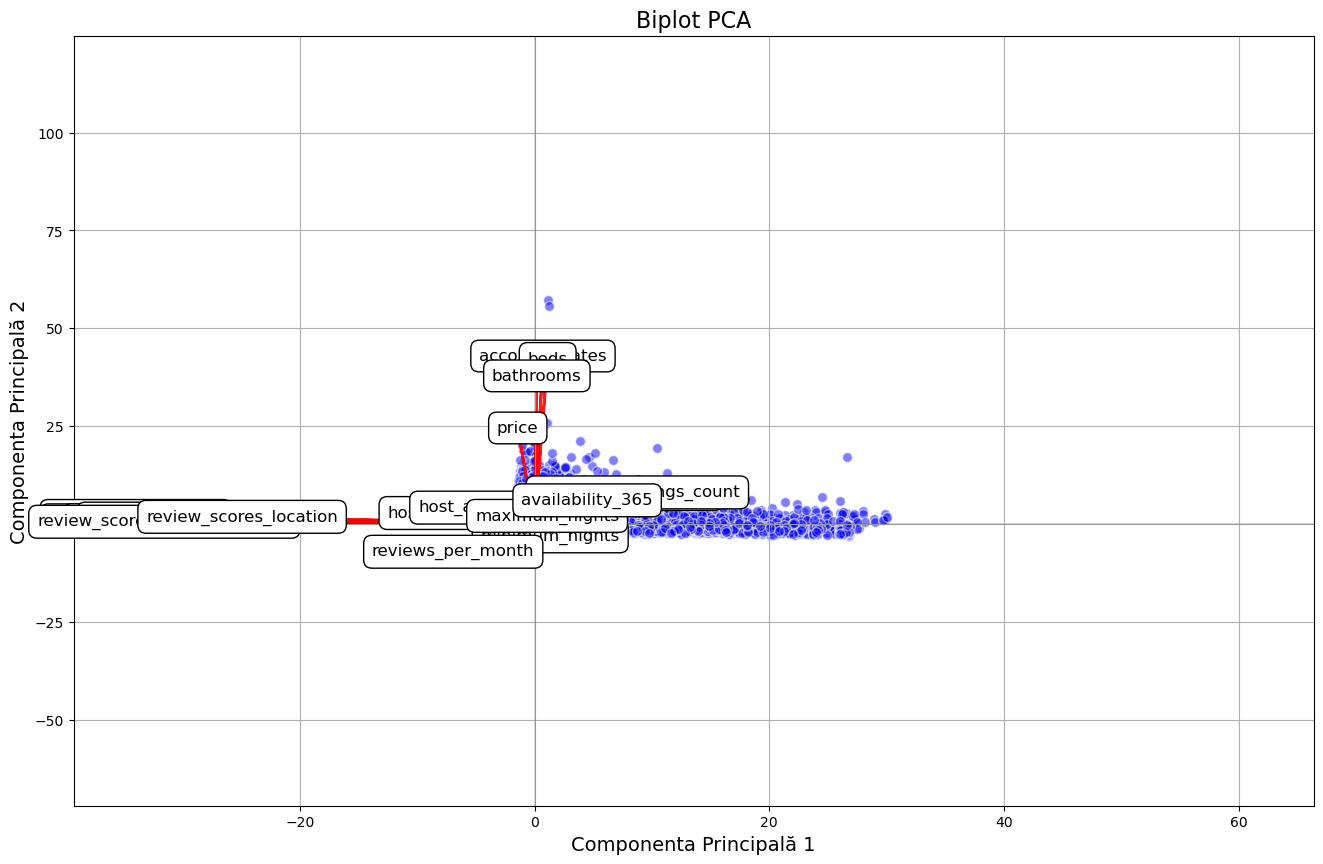

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Presupunem că 'X_trainPCA' este DataFrame-ul cu datele tale
X = X_trainPCA.values

# Standardizarea caracteristicilor
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Crearea biplot-ului
plt.figure(figsize=(16, 10))  # Măriți figura dacă este necesar
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='blue', edgecolors='w', s=50)

# Adăugarea săgeților și a etichetelor
vector_multiplier = 70  # Ajustați acest multiplicator pentru a schimba lungimea săgeților
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0]*vector_multiplier, v[1]*vector_multiplier, color='red', alpha=0.9, lw=2, head_width=0.1)
    plt.text(v[0]*vector_multiplier*1.1, v[1]*vector_multiplier*1.1, X_trainPCA.columns[i], color='black', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Determinarea limitelor graficului pe baza datelor
x_min, x_max = min(X_pca[:, 0]), max(X_pca[:, 0])
y_min, y_max = min(X_pca[:, 1]), max(X_pca[:, 1])
x_margin = (x_max - x_min) * 1.1
y_margin = (y_max - y_min) * 1.1

plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)

# Etichete și titlu
plt.xlabel('Componenta Principală 1', fontsize=14)
plt.ylabel('Componenta Principală 2', fontsize=14)
plt.title('Biplot PCA', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', lw=0.2)
plt.axvline(0, color='black', lw=0.2)
plt.show()


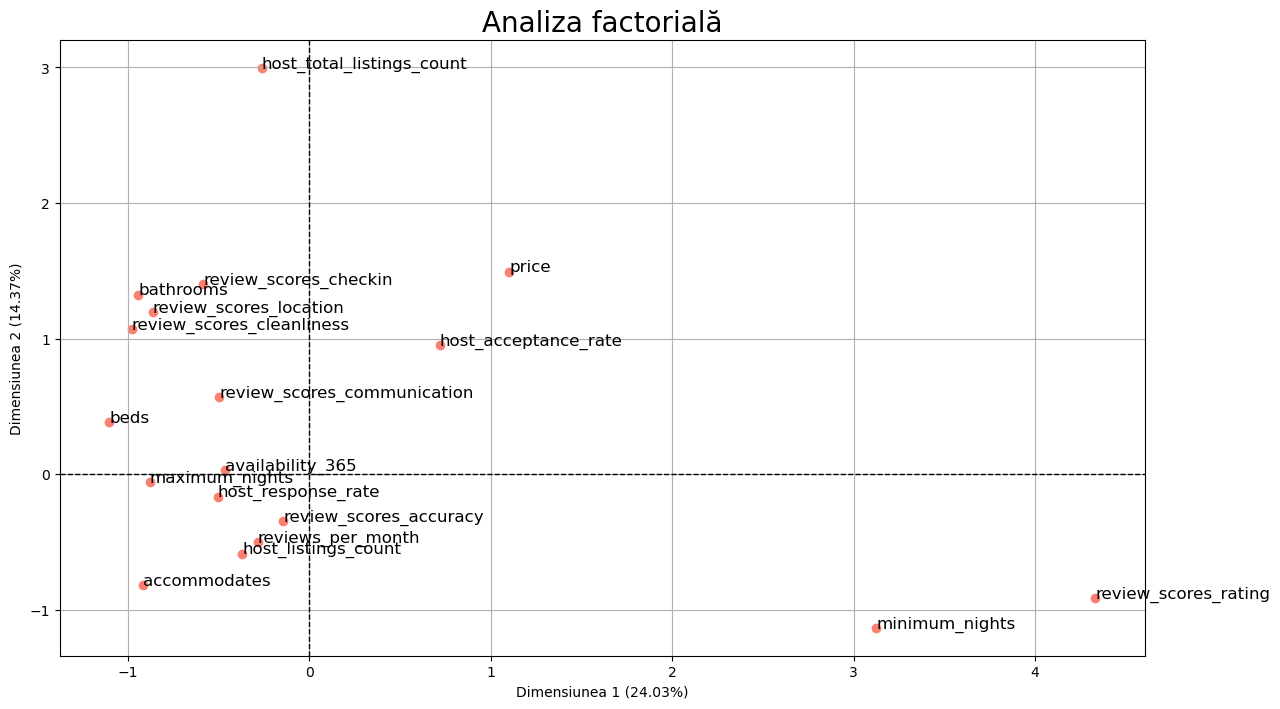

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = X_trainPCA.columns

# Aplicarea PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

# Crearea graficului
plt.figure(figsize=(14, 8))
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    if i < len(features):
        plt.scatter(x, y, color='salmon')  # Punctele în spațiul PCA
        plt.text(x, y, features[i], fontsize=12)  # Adaugă etichetele pentru fiecare punct

        # Setarea limitelor pentru a include săgețile

# Adaugă titlu și etichete axe
plt.title('Analiza factorială', fontsize=20)
plt.xlabel('Dimensiunea 1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('Dimensiunea 2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.grid(True)
# Adaugă linia axei X
plt.axhline(y=0, color='k', linestyle='--', lw=1)

# Adaugă linia axei Y
plt.axvline(x=0, color='k', linestyle='--', lw=1)

# Afișează graficul
plt.show()


In [70]:
#Analiza PCA

In [71]:
X_trainPCA = df0[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','beds','price','minimum_nights','maximum_nights','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','bathrooms']]

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_num = scaler.fit_transform(X_trainPCA)

In [73]:
#APLICAREA FUNCȚIEI PCA DIN PACHETUL SKLEARN

from sklearn.decomposition import PCA

pca = PCA(random_state=42).fit(data_num)
#random_state - asigura reproductibilitatea la rulari diferite


In [74]:
#ELEMENTE ALE METODEI PCA


#VARIATIA EXPLICATA DE NOILE COMPONENTE PRINCIPALE 
valori_proprii = pca.explained_variance_

# Se calculeaza suma tuturor valorilor proprii
variatia_totala = np.sum(valori_proprii)

# Se calculeaza procentajul de informatie pentru fiecare componenta principala
variatia_totala = valori_proprii / variatia_totala * 100
variatia_cumulata = np.cumsum(variatia_totala)

print("PC\tValori_proprii\t%Procent_Info\t%Procent_Info_Cum")
print("----------------------------------------")
for i in range(len(variatia_totala)):
    print(f"  {i + 1}\t\t{valori_proprii[i]:.2f}\t\t{variatia_totala[i]:.2f}%\t\t{variatia_cumulata[i]:.2f}%")


PC	Valori_proprii	%Procent_Info	%Procent_Info_Cum
----------------------------------------
  1		4.33		24.03%		24.03%
  2		2.59		14.37%		38.39%
  3		1.92		10.65%		49.04%
  4		1.61		8.96%		58.00%
  5		1.05		5.84%		63.84%
  6		0.98		5.45%		69.29%
  7		0.95		5.28%		74.57%
  8		0.85		4.72%		79.29%
  9		0.77		4.28%		83.57%
  10		0.59		3.27%		86.83%
  11		0.53		2.97%		89.80%
  12		0.50		2.75%		92.55%
  13		0.46		2.58%		95.14%
  14		0.29		1.60%		96.74%
  15		0.24		1.34%		98.08%
  16		0.16		0.90%		98.98%
  17		0.15		0.82%		99.80%
  18		0.04		0.20%		100.00%


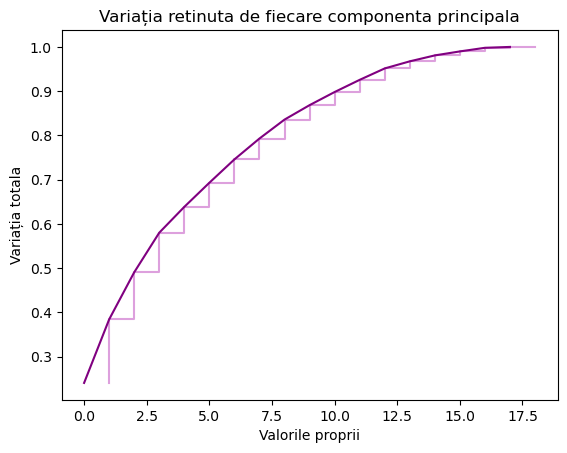

In [75]:
#REPREZENTARE GRAFICA VARIATIE

plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), color = 'plum')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='purple')
plt.xlabel('Valorile proprii')
plt.ylabel('Variația totala')
plt.title('Variația retinuta de fiecare componenta principala')
plt.show()

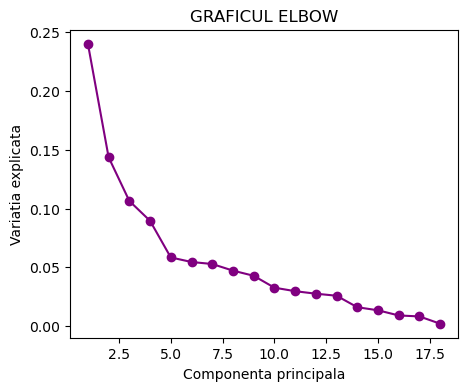

In [76]:
#ALEGEREA NUMARULUI DE COMPONENTE PRINCIPALE


#GRAFICUL ELBOW
plt.figure(figsize=(5, 4))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color = 'purple')
plt.title('GRAFICUL ELBOW')
plt.xlabel('Componenta principala')
plt.ylabel('Variatia explicata')
plt.show()

In [77]:
#3.    CREAREA NOULUI SET DE DATE SI INTERPRETAREA REZULTATELOR


#COEFICIENTII COMPONENTELOR PRINCIPALE
#Components = coeficientii combinatiilor liniare dintre variabilele initiale sau ponderile fiecarei variabile initiale in construirea noilor componente.

n = 1
for component in pca.components_ :
    print('n_component = ', n)
    print(component)
    print('_'*50)
    n+=1

n_component =  1
[-0.07282253 -0.02762809  0.1113833   0.11374565  0.00935913  0.01456183
 -0.01851241  0.01738905  0.01392292  0.05821243 -0.44107056 -0.42676566
 -0.3913525  -0.39212498 -0.40956857 -0.3234741  -0.08990162  0.00261477]
__________________________________________________
n_component =  2
[ 0.0364763   0.0544045   0.09993797  0.10494191  0.55740323  0.54948156
  0.31868567 -0.04082172  0.02702021  0.07862003  0.02676918  0.01237556
  0.01296371  0.01792139  0.00756903  0.02389692 -0.09192382  0.49143197]
__________________________________________________
n_component =  3
[ 0.05254549  0.06266585  0.68147654  0.67919081 -0.09158371 -0.10363253
 -0.03146792  0.05683449  0.02808431  0.0678049   0.07024897  0.08188253
  0.08703023  0.04324316  0.02756721  0.08423335 -0.05075339 -0.08574738]
__________________________________________________
n_component =  4
[-5.49600517e-01 -6.23349345e-01  1.58828127e-05 -3.43280711e-05
 -4.69512114e-02 -1.78838298e-02  9.09430884e-02  2.35

In [78]:
# Afișarea vectorilor proprii pentru fiecare componentă principală
components = pca.components_
features = X_trainPCA.columns

for i, component in enumerate(components):
    component_eq = " + ".join(f"{weight:.3f}*{feature}" for weight, feature in zip(component, features))
    print(f"Componenta {i+1}: {component_eq}")

Componenta 1: -0.073*host_response_rate + -0.028*host_acceptance_rate + 0.111*host_listings_count + 0.114*host_total_listings_count + 0.009*accommodates + 0.015*beds + -0.019*price + 0.017*minimum_nights + 0.014*maximum_nights + 0.058*availability_365 + -0.441*review_scores_rating + -0.427*review_scores_accuracy + -0.391*review_scores_cleanliness + -0.392*review_scores_checkin + -0.410*review_scores_communication + -0.323*review_scores_location + -0.090*reviews_per_month + 0.003*bathrooms
Componenta 2: 0.036*host_response_rate + 0.054*host_acceptance_rate + 0.100*host_listings_count + 0.105*host_total_listings_count + 0.557*accommodates + 0.549*beds + 0.319*price + -0.041*minimum_nights + 0.027*maximum_nights + 0.079*availability_365 + 0.027*review_scores_rating + 0.012*review_scores_accuracy + 0.013*review_scores_cleanliness + 0.018*review_scores_checkin + 0.008*review_scores_communication + 0.024*review_scores_location + -0.092*reviews_per_month + 0.491*bathrooms
Componenta 3: 0.053*

In [79]:
# MATRICEA FACTOR
# MATRICE DE CORELATIE INTRE VARIABILELE INITIALE SI NOILE COMPONENTE PRINCIPALE


import numpy as np
# Calcularea proiectiilor pe primele doua componente principale
pca = PCA(n_components=5)
pca.fit(data_num)

pca_data = pca.transform(data_num)
pca_data

array([[-0.50336522, -0.16352635, -0.18897432, -0.04746884, -0.54031179],
       [ 0.71989453,  0.95115157, -0.61366417,  1.88316857, -0.26757652],
       [-0.36824316, -0.58483021,  0.03426122,  0.16005552,  0.97861361],
       ...,
       [-0.75544807, -1.39555653, -0.03936681, -1.18656587, -0.89497641],
       [-1.29949355,  2.30738096, -0.50900251, -0.71424337, -0.69784697],
       [-1.36355037, -1.30991294,  0.00563873, -1.48093194, -0.87696124]])

In [80]:
# Crearea unui DataFrame cu proiectiile si variabilele initiale
pca_data1 = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'])
data_combinat= pd.concat([X_trainPCA, pca_data1], axis=1)

In [81]:
# Calcularea matricei de corelatie intre primele doua componente principale si variabilele initiale
matrice_corelatie = data_combinat[['PC1', 'PC2', 'PC3','PC4','PC5','host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','beds','price','minimum_nights','maximum_nights','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','bathrooms']].corr()
matrice_corelatie = matrice_corelatie.iloc[5:, :5]

# Afisarea matricei de corelatie
print(matrice_corelatie)

                                  PC1       PC2       PC3       PC4       PC5
host_response_rate          -0.003105  0.001107  0.002773 -0.006915 -0.002496
host_acceptance_rate        -0.000913  0.009029 -0.000506 -0.011335 -0.000374
host_listings_count          0.001961 -0.007474 -0.001653  0.001147 -0.001439
host_total_listings_count    0.002276 -0.008853 -0.001942  0.002647 -0.001640
accommodates                -0.001133 -0.000299 -0.009144 -0.005397 -0.001342
beds                        -0.004508  0.007317 -0.006461 -0.008765  0.002603
price                        0.003381 -0.022091  0.003951  0.003492 -0.006362
minimum_nights               0.004533  0.003198  0.003177 -0.000512  0.003289
maximum_nights               0.000152  0.002254  0.000802  0.000964 -0.001071
availability_365            -0.002300  0.010738  0.000057 -0.002418  0.005396
review_scores_rating        -0.000486  0.003672  0.005530 -0.003251 -0.002587
review_scores_accuracy       0.003434  0.006650  0.005037 -0.006

In [82]:
#REPREZENTARE GRAFICA

matrice_corelatie.style.background_gradient(cmap='Purples', axis=None).format(precision=4) 


#SCORURILE COMPONENTELOR PRINCIPALE

,PC1,PC2,PC3,PC4,PC5
host_response_rate,-0.0031,0.0011,0.0028,-0.0069,-0.0025
host_acceptance_rate,-0.0009,0.0090,-0.0005,-0.0113,-0.0004
host_listings_count,0.0020,-0.0075,-0.0017,0.0011,-0.0014
host_total_listings_count,0.0023,-0.0089,-0.0019,0.0026,-0.0016
accommodates,-0.0011,-0.0003,-0.0091,-0.0054,-0.0013
beds,-0.0045,0.0073,-0.0065,-0.0088,0.0026
price,0.0034,-0.0221,0.0040,0.0035,-0.0064
minimum_nights,0.0045,0.0032,0.0032,-0.0005,0.0033
maximum_nights,0.0002,0.0023,0.0008,0.0010,-0.0011
availability_365,-0.0023,0.0107,0.0001,-0.0024,0.0054


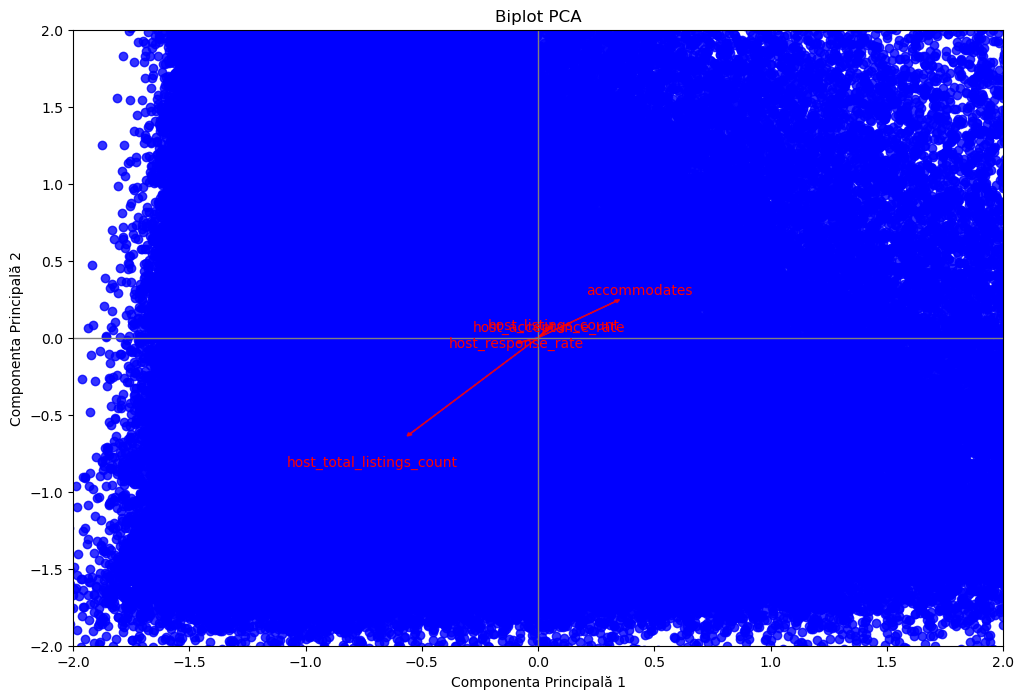

In [83]:
# Setăm dimensiunea graficului
plt.figure(figsize=(12, 8))

# Creează scatter plot pentru primele două componente principale
plt.scatter(pca_data1['PC1'], pca_data1['PC2'], alpha=0.8, color='blue')

# Adăugăm vectorii de încărcare
for i in range(len(pca.components_)):
    plt.arrow(0, 0, 
              pca.components_[i, 0], pca.components_[i, 1], 
              color='red', alpha=0.8, head_width=0.02, head_length=0.02)

    # Etichete pentru vectorii de încărcare
    plt.text(pca.components_[i, 0] * 1.3, pca.components_[i, 1] * 1.3, 
             X_trainPCA.columns[i], color='red', ha='center', va='center')

# Stabilirea limitelor și adăugarea liniilor axelor
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Etichetăm axele și adăugăm titlu
plt.xlabel('Componenta Principală 1')
plt.ylabel('Componenta Principală 2')
plt.title('Biplot PCA')

# Afișăm graficul
plt.show()


In [84]:
#kmeans

In [85]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_trainPCA)
# pca = PCA(n_components=10)  # Sau oricât doriți să păstrați
# X_pca = pca.fit_transform(X_train_scaled)  # Aplicați PCA
# from sklearn.preprocessing import StandardScaler




In [86]:
#2.  APLICAREA METODEI KMEANS

from sklearn.cluster import KMeans 


kmeans_model = KMeans(n_clusters = 2, max_iter = 1000, n_init=10) 
kmeans_model.fit(X_pca)



KMeans(max_iter=1000, n_clusters=2, n_init=10)

In [87]:
#EVIDENTIEREA CENTROIZILOR

kmeans_cluster = kmeans_model.cluster_centers_
kmeans_centroids = np.array(kmeans_cluster) #Centroizii clusterelor
print(kmeans_centroids)

[[ 6.21435527e+00  1.04172025e-01  7.37386817e-01 -6.62365174e-02
  -7.81144173e-02]
 [-3.72021073e-01 -6.23623640e-03 -4.41435069e-02  3.96523520e-03
   4.67630319e-03]]


In [88]:
#3.  OPTIMIZAREA NUMARULUI DE CLUSTERE

#INERTIA

kmeans_set = {'init' : 'random','n_init' : 11,'max_iter' : 300,'random_state' : 42}
list_kmeans = []

for k in range(2, 11) :
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X_pca)
    list_kmeans.append(kmeans.inertia_)
    print(f"Inertia pentru {k} clustere: {kmeans.inertia_}")



Inertia pentru 2 clustere: 2483097.205739394
Inertia pentru 3 clustere: 2064597.6613876196
Inertia pentru 4 clustere: 1699163.503812434
Inertia pentru 5 clustere: 1461313.490143434
Inertia pentru 6 clustere: 1244352.0206315964
Inertia pentru 7 clustere: 1138445.378311155
Inertia pentru 8 clustere: 1043172.9454751346
Inertia pentru 9 clustere: 953902.9138645041
Inertia pentru 10 clustere: 909320.0463805943


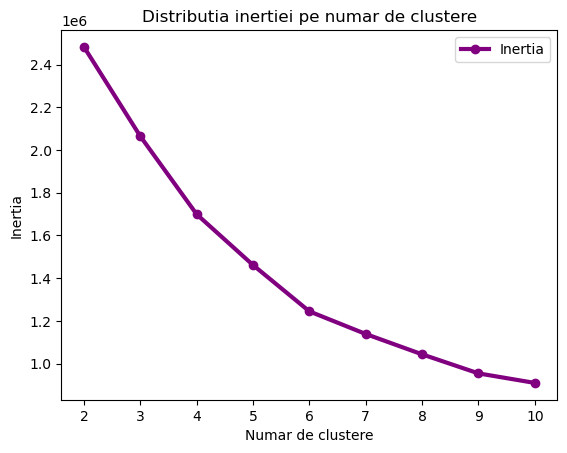

In [89]:
#REPREZENTARE GRAFICA A INERTIEI - GRAFICUL ELBOW

#!pip install kneed
from kneed import KneeLocator
k1 = KneeLocator(range(2, 11), list_kmeans, curve='convex', direction='decreasing')

plt.plot(range(2, 11), list_kmeans, linewidth=3, label='Inertia', color = 'purple', marker='o')
plt.xlabel('Numar de clustere')
plt.title('Distributia inertiei pe numar de clustere')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [90]:
#Analiza Cluster  

/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

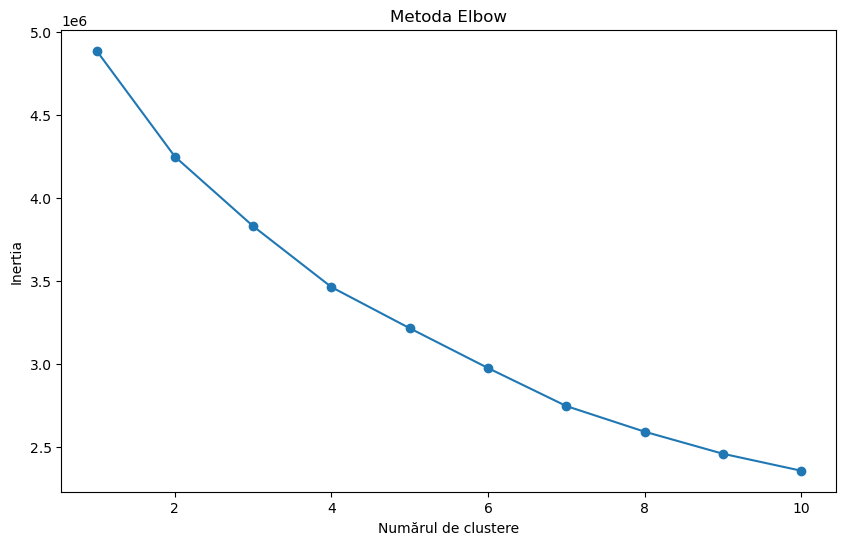

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Determină numărul optim de clustere, de exemplu, prin metoda elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Plotează metoda elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metoda Elbow')
plt.xlabel('Numărul de clustere')
plt.ylabel('Inertia')
plt.show()

/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


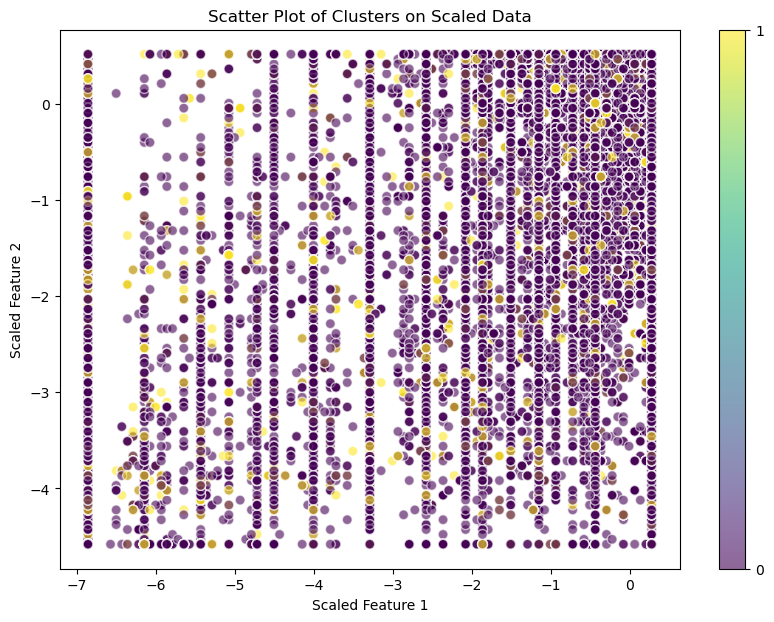

In [92]:
# Pasul 3: Clustering cu KMeans (deja ai efectuat acest pas)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_std)
clusters = kmeans.labels_

# Alege două variabile pentru axele x și y
# Vom presupune că ai două caracteristici numite 'feature1' și 'feature2' în X_scaled
feature_x = X_std[:, 0]  # Primul feature scalat
feature_y = X_std[:, 1]  # Al doilea feature scalat

# Acum, fără PCA, putem face un grafic scatter pentru a vizualiza clusterele
plt.figure(figsize=(10, 7))
plt.scatter(feature_x, feature_y, c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolor='w', s=50)
plt.colorbar(ticks=[0, 1, 2, 3])
plt.title('Scatter Plot of Clusters on Scaled Data')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()


In [93]:
#PCA + Analiza Cluster Analiza finala

/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

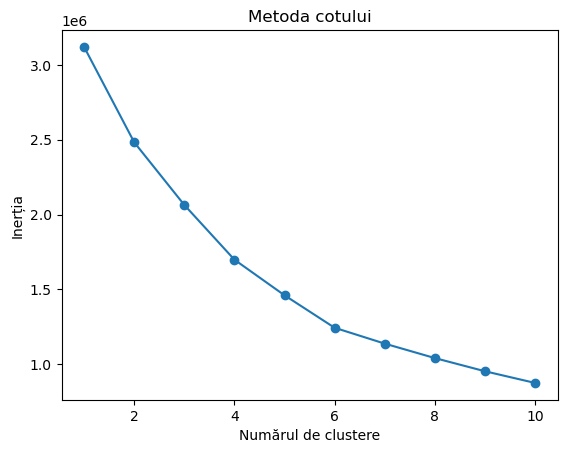

In [94]:
# Determinarea numărului de clustere (e.g., folosind metoda cotului)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metoda cotului')
plt.xlabel('Numărul de clustere')
plt.ylabel('Inerția')
plt.show()

In [95]:
# de redenumit componentele principale dupa PCA de mai sus

/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



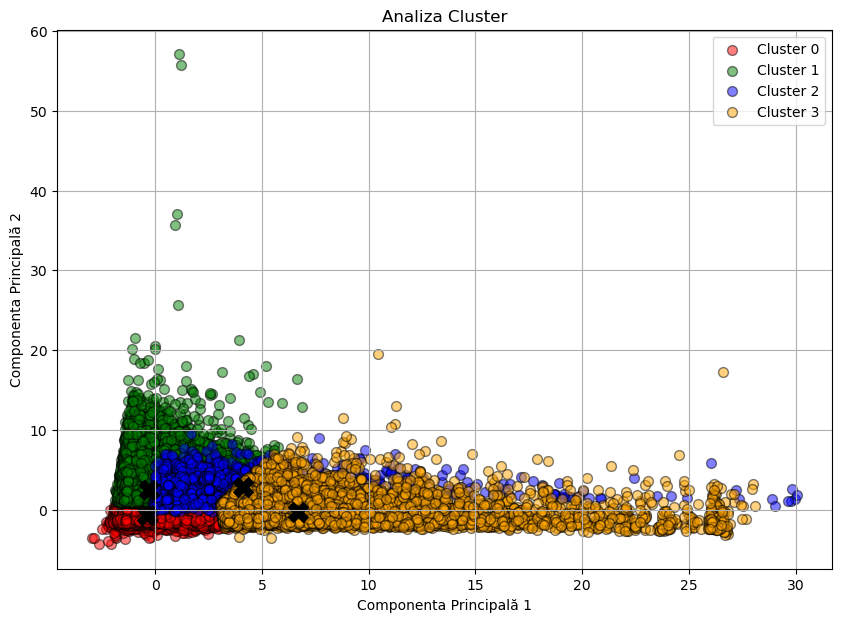

In [128]:
# Aplică KMeans pentru a identifica clustere
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Crează un grafic scatter cu clusterele
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue','orange']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']

for i in range(4):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                label=labels[i], color=colors[i], alpha=0.5, edgecolor='k', s=50)

# Adaugă centroizii pe grafic
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X')

# Adaugă legenda și titlurile axelor
plt.legend()
plt.title('Analiza Cluster')
plt.xlabel('Componenta Principală 1')
plt.ylabel('Componenta Principală 2')
plt.grid(True)
plt.show()

/Users/emilneacsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



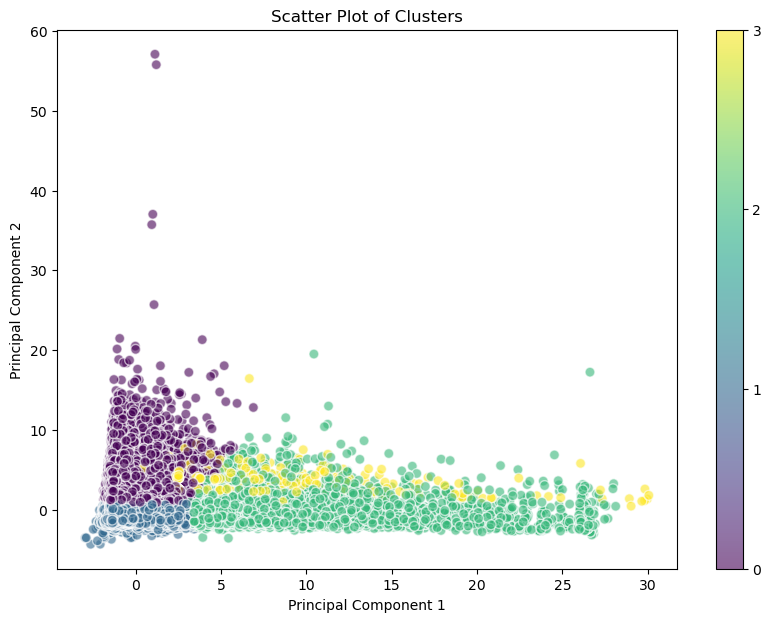

In [130]:
#Cluster+PCA de la 0# Pasul 2: Aplică PCA pentru a reduce dimensiunile pentru vizualizare (opțional)
pca = PCA(n_components=5)  # 2 dimensiuni pentru vizualizare 2D
X_pca = pca.fit_transform(X_std)

# Pasul 3: Clustering cu KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_std)  # Aici trebuie să folosești datele scalate, nu cele PCA pentru procesul de clustering
clusters = kmeans.labels_



# Acum, cu etichetele de cluster adăugate, poți crea vizualizări
# Exemplu de vizualizare scatter plot folosind PCA:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolor='w', s=50)
plt.colorbar(ticks=[0, 1, 2,3,])
plt.title('Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [98]:
df3=df0.copy()
df3['Cluster'] = kmeans.labels_.tolist()
df3.head(10)

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,accommodates,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathrooms,Cluster
0,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,Entire rental unit,4,1.0,157.0,7,365,t,0,0,0,0,99,26/09/2010,10/12/2023,4.87,4.91,4.95,4.90,4.85,4.61,4.84,f,0.61,2.0,1
1,Mirko Ian,08/06/2011,Switzerland,within a few hours,0.90,0.47,f,1,1,"['email', 'phone', 'work_email']",t,t,Entire condo,6,4.0,400.0,2,1125,t,8,12,12,224,43,24/08/2011,21/12/2023,4.67,4.67,4.74,4.76,4.90,4.45,4.43,f,0.29,1.0,0
2,Cristiano,28/12/2011,"Riva del Garda, Italy",within an hour,1.00,0.93,t,11,11,"['email', 'phone']",t,t,Entire condo,3,2.0,116.0,3,1125,t,20,20,49,263,1,02/01/2022,02/01/2022,5.00,5.00,5.00,5.00,5.00,4.00,4.00,t,0.04,1.0,1
3,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,Entire rental unit,10,5.0,386.0,5,1125,t,24,47,75,340,49,05/10/2012,01/09/2023,4.88,4.90,4.86,4.96,4.98,4.43,4.84,f,0.36,2.0,0
4,Daniele,09/07/2010,"Brez, Italy",within a few hours,0.96,0.92,t,4,4,"['email', 'phone']",t,t,Entire rental unit,4,1.0,115.0,5,1125,t,0,0,0,0,59,19/05/2012,01/10/2023,4.92,4.91,4.93,5.00,4.96,4.74,4.89,f,0.42,1.0,1
5,Cecilia,03/04/2012,"Trentino-South Tyrol, Italy",within an hour,1.00,1.00,t,2,2,"['email', 'phone']",t,t,Entire chalet,4,4.0,174.0,3,30,t,11,36,64,334,127,05/10/2012,11/12/2023,4.98,4.93,4.98,4.97,4.96,4.91,4.89,t,0.93,1.0,1
6,Giulia,29/05/2012,"Milan, Italy",within a few hours,1.00,1.00,f,1,2,"['email', 'phone']",t,t,Entire townhouse,6,5.0,110.0,7,30,t,19,40,63,222,44,23/06/2013,13/08/2023,4.45,4.65,4.43,4.91,4.95,4.33,4.44,f,0.34,2.0,0
7,Emanuela,04/07/2012,"New York, NY",within an hour,1.00,0.50,f,2,3,['phone'],t,t,Entire rental unit,3,1.0,100.0,5,30,t,22,52,82,357,1,26/08/2023,26/08/2023,4.00,5.00,3.00,4.00,5.00,5.00,4.00,f,0.23,1.0,1
9,Sybille,17/09/2012,"Trento, Italy",within an hour,1.00,1.00,t,2,2,"['email', 'phone']",t,t,Entire bed and breakfast,5,3.0,70.0,2,1125,t,0,0,0,0,106,20/10/2012,17/12/2023,4.89,4.91,4.94,4.95,4.95,4.77,4.83,t,0.78,1.0,1
10,Alex,05/10/2012,"Vigo di Fassa, Italy",within an hour,1.00,0.85,f,2,2,['phone'],t,t,Entire rental unit,4,4.0,83.0,1,7,t,12,16,44,72,46,14/02/2015,26/12/2023,4.83,4.91,4.89,4.78,4.85,4.87,4.83,f,0.43,1.0,1


In [99]:
import pandas as pd

# Let's assume 'df' is your DataFrame
# Add a new column 'country' that extracts the country from 'host_location'
df3['country'] = df3['host_location'].apply(lambda x: x.split(', ')[-1])

# Display the DataFrame to verify the results
print(df3[['host_location', 'country']])


                host_location      country
0                 Brez, Italy        Italy
1                 Switzerland  Switzerland
2       Riva del Garda, Italy        Italy
3                 Brez, Italy        Italy
4                 Brez, Italy        Italy
...                       ...          ...
420917        Toronto, Canada       Canada
420919        Toronto, Canada       Canada
420920        Toronto, Canada       Canada
420921        Toronto, Canada       Canada
420922    Mississauga, Canada       Canada

[271531 rows x 2 columns]


In [100]:
#CLuster0
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 1]

# Group by 'host_location' and count the number of entries in each city for cluster 1
city_counts = cluster1_df.groupby('host_location').size().reset_index(name='count')

# Sort the cities by count if desired
city_counts_sorted = city_counts.sort_values(by='count', ascending=False)

# Display the result
print(city_counts_sorted)



               host_location  count
5040  London, United Kingdom  11469
6679           Paris, France  11190
7499             Rome, Italy   6879
5619            Milan, Italy   5399
5203           Madrid, Spain   4505
...                      ...    ...
3030            Fares, Spain      1
6501   Oromahoe, New Zealand      1
3031         Farmingdale, NY      1
3032    Farmington Hills, MI      1
0            A Coruña, Spain      1

[10033 rows x 2 columns]


In [101]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 0]

# Group by 'host_location' and count the number of entries in each city for cluster 1
city_counts = cluster1_df.groupby('host_location').size().reset_index(name='count')

# Sort the cities by count if desired
city_counts_sorted = city_counts.sort_values(by='count', ascending=False)

# Display the result
print(city_counts_sorted)

                   host_location  count
2598      London, United Kingdom   1866
2612             Los Angeles, CA   1292
3443               Paris, France   1139
3857                 Rome, Italy   1117
3118               Nashville, TN   1103
...                          ...    ...
2218         Karratha, Australia      1
2219        Karridale, Australia      1
2222         Kato Gouves, Greece      1
2225  Kawarau Falls, New Zealand      1
2576          Llucmaçanes, Spain      1

[5153 rows x 2 columns]


In [102]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 2]

# Group by 'host_location' and count the number of entries in each city for cluster 1
city_counts = cluster1_df.groupby('host_location').size().reset_index(name='count')

# Sort the cities by count if desired
city_counts_sorted = city_counts.sort_values(by='count', ascending=False)

# Display the result
print(city_counts_sorted)

               host_location  count
706   London, United Kingdom    940
956            Paris, France    628
787             Milan, Italy    607
866             New York, NY    310
722            Madrid, Spain    294
...                      ...    ...
616       Kilcolgan, Ireland      1
618       Kilmore, Australia      1
620      Kingston, Australia      1
621    Kirribilli, Australia      1
1449    Ōmāpere, New Zealand      1

[1450 rows x 2 columns]


In [103]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 3]

# Group by 'host_location' and count the number of entries in each city for cluster 1
city_counts = cluster1_df.groupby('host_location').size().reset_index(name='count')

# Sort the cities by count if desired
city_counts_sorted = city_counts.sort_values(by='count', ascending=False)

# Display the result
print(city_counts_sorted)

                host_location  count
0       Auckland, New Zealand    644
8                New York, NY    481
1             Casarano, Italy    243
13            Urrugne, France     93
12              United States     47
9             Princeville, HI     44
14        Zürich, Switzerland     27
5      London, United Kingdom     22
7                   Miami, FL     21
10          San Francisco, CA     16
2                     Denmark     13
6   Lowestoft, United Kingdom      5
11   Scotland, United Kingdom      4
3     England, United Kingdom      1
4                      Greece      1


In [104]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 1]

# Group by 'host_location' and count the number of entries in each city for cluster 1
country_counts = cluster1_df.groupby('country').size().reset_index(name='count')

# Sort the cities by count if desired
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Display the result
print(country_counts_sorted)

            country  count
83            Italy  33084
182  United Kingdom  18559
52           France  18026
165           Spain  15451
10        Australia  14011
..              ...    ...
49        Famagusta      1
47         Ethiopia      1
149     Puerto Rico      1
154          Rwanda      1
196        Zimbabwe      1

[197 rows x 2 columns]


In [105]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 0]

# Group by 'host_location' and count the number of entries in each city for cluster 1
country_counts = cluster1_df.groupby('country').size().reset_index(name='count')

# Sort the cities by count if desired
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Display the result
print(country_counts_sorted)

              country  count
7           Australia   6204
56              Italy   5907
120             Spain   5305
90        New Zealand   3733
132    United Kingdom   3171
..                ...    ...
43          Guatemala      1
95                 OK      1
1                  AR      1
38   French Polynesia      1
114      Saudi Arabia      1

[143 rows x 2 columns]


In [106]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 2]

# Group by 'host_location' and count the number of entries in each city for cluster 1
country_counts = cluster1_df.groupby('country').size().reset_index(name='count')

# Sort the cities by count if desired
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Display the result
print(country_counts_sorted)

            country  count
48            Italy   2315
94            Spain   1532
107  United Kingdom   1390
33           France    889
6         Australia    812
..              ...    ...
84            Qatar      1
87           Russia      1
59         Malaysia      1
37        Guatemala      1
114              WI      1

[115 rows x 2 columns]


In [107]:
import pandas as pd

# Assuming 'df' is your original DataFrame and it has 'host_location' and 'Cluster' columns
# Filter the DataFrame to include only entries from cluster 1
cluster1_df = df3[df3['Cluster'] == 3]

# Group by 'host_location' and count the number of entries in each city for cluster 1
country_counts = cluster1_df.groupby('country').size().reset_index(name='count')

# Sort the cities by count if desired
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Display the result
print(country_counts_sorted)

           country  count
8      New Zealand    644
7               NY    481
6            Italy    243
3           France     93
11   United States     47
5               HI     44
10  United Kingdom     32
9      Switzerland     27
2               FL     21
0               CA     16
1          Denmark     13
4           Greece      1


In [108]:
iso_codes = {
    # Already existing part
    "United States": "USA", "Canada": "CAN", "New Zealand": "NZL",
    "Afghanistan": "AFG", "Albania": "ALB", "Algeria": "DZA",
    "Andorra": "AND", "Angola": "AGO", "Antigua and Barbuda": "ATG",
    "Argentina": "ARG", "Armenia": "ARM", "Australia": "AUS",
    "Austria": "AUT", "Azerbaijan": "AZE", "Bahamas": "BHS",
    "Bahrain": "BHR", "Bangladesh": "BGD", "Barbados": "BRB",
    "Belarus": "BLR", "Belgium": "BEL", "Belize": "BLZ",
    "Benin": "BEN", "Bhutan": "BTN", "Bolivia": "BOL",
    "Bosnia and Herzegovina": "BIH", "Botswana": "BWA", "Brazil": "BRA",
    "Brunei": "BRN", "Bulgaria": "BGR", "Burkina Faso": "BFA",
    "Burundi": "BDI", "Côte d'Ivoire": "CIV", "Cabo Verde": "CPV",
    "Cambodia": "KHM", "Cameroon": "CMR", "Central African Republic": "CAF",
    "Chad": "TCD", "Chile": "CHL", "China": "CHN",
    "Colombia": "COL", "Comoros": "COM", "Congo (Congo-Brazzaville)": "COG",
    "Costa Rica": "CRI", "Croatia": "HRV", "Cuba": "CUB",
    "Cyprus": "CYP", "Czechia (Czech Republic)": "CZE", "Democratic Republic of the Congo": "COD",
    "Denmark": "DNK", "Djibouti": "DJI", "Dominica": "DMA",
    # New entries
    "Dominican Republic": "DOM", "Ecuador": "ECU", "Egypt": "EGY",
    "El Salvador": "SLV", "Equatorial Guinea": "GNQ", "Eritrea": "ERI",
    "Estonia": "EST", "Eswatini": "SWZ", "Ethiopia": "ETH",
    "Fiji": "FJI", "Finland": "FIN", "France": "FRA",
    "Gabon": "GAB", "Gambia": "GMB", "Georgia": "GEO",
    "Germany": "DEU", "Ghana": "GHA", "Greece": "GRC",
    "Grenada": "GRD", "Guatemala": "GTM", "Guinea": "GIN",
    "Guinea-Bissau": "GNB", "Guyana": "GUY", "Haiti": "HTI",
    "Honduras": "HND", "Hungary": "HUN", "Iceland": "ISL",
    "India": "IND", "Indonesia": "IDN", "Iran": "IRN",
    "Iraq": "IRQ", "Ireland": "IRL", "Israel": "ISR",
    "Italy": "ITA", "Jamaica": "JAM", "Japan": "JPN",
    "Jordan": "JOR", "Kazakhstan": "KAZ", "Kenya": "KEN",
    "Kiribati": "KIR", "Kuwait": "KWT", "Kyrgyzstan": "KGZ",
    "Laos": "LAO", "Latvia": "LVA", "Lebanon": "LBN",
    "Lesotho": "LSO", "Liberia": "LBR", "Libya": "LBY",
    "Liechtenstein": "LIE", "Lithuania": "LTU", "Luxembourg": "LUX",
    "Madagascar": "MDG", "Malawi": "MWI", "Malaysia": "MYS",
    "Maldives": "MDV", "Mali": "MLI", "Malta": "MLT",
    "Marshall Islands": "MHL", "Mauritania": "MRT", 
    "Mauritius": "MUS", "Mexico": "MEX", "Micronesia": "FSM",
    "Moldova": "MDA", "Monaco": "MCO", "Mongolia": "MNG",
    "Montenegro": "MNE", "Morocco": "MAR", "Mozambique": "MOZ",
    "Myanmar (formerly Burma)": "MMR", "Namibia": "NAM", "Nauru": "NRU",
    "Nepal": "NPL", "Netherlands": "NLD", "New Zealand": "NZL",
    "Nicaragua": "NIC", "Niger": "NER", "Nigeria": "NGA",
    "North Korea": "PRK", "North Macedonia (formerly Macedonia)": "MKD",
    "Norway": "NOR", "Oman": "OMN", "Pakistan": "PAK",
    "Palau": "PLW", "Palestine State": "PSE", "Panama": "PAN",
    "Papua New Guinea": "PNG", "Paraguay": "PRY", "Peru": "PER",
    "Philippines": "PHL", "Poland": "POL", "Portugal": "PRT",
    "Qatar": "QAT", "Romania": "ROU", "Russia": "RUS",
    "Rwanda": "RWA", "Saint Kitts and Nevis": "KNA", "Saint Lucia": "LCA",
    "Saint Vincent and the Grenadines": "VCT", "Samoa": "WSM",
    "San Marino": "SMR", "Sao Tome and Principe": "STP", "Saudi Arabia": "SAU",
    "Senegal": "SEN", "Serbia": "SRB", "Seychelles": "SYC",
    "Sierra Leone": "SLE", "Singapore": "SGP", "Slovakia": "SVK",
    "Slovenia": "SVN", "Solomon Islands": "SLB", "Somalia": "SOM",
    "South Africa": "ZAF", "South Korea": "KOR", "South Sudan": "SSD",
    "Spain": "ESP", "Sri Lanka": "LKA", "Sudan": "SDN",
    "Suriname": "SUR", "Sweden": "SWE", "Switzerland": "CHE",
    "Syria": "SYR", "Taiwan": "TWN", "Tajikistan": "TJK",
    "Tanzania": "TZA", "Thailand": "THA", "Timor-Leste": "TLS",
    "Togo": "TGO", "Tonga": "TON", "Trinidad and Tobago": "TTO",
    "Tunisia": "TUN", "Turkey": "TUR", "Turkmenistan": "TKM",
    "Tuvalu": "TUV", "Uganda": "UGA", "Ukraine": "UKR",
    "United Arab Emirates": "ARE", "United Kingdom": "GBR",
    "United States": "USA", "Uruguay": "URY", "Uzbekistan": "UZB",
    "Vanuatu": "VUT", "Venezuela": "VEN", "Vietnam": "VNM",
    "Yemen": "YEM", "Zambia": "ZMB", "Zimbabwe": "ZWE"
}


In [109]:
# Function to apply mapping
def apply_iso_code(country):
    return iso_codes.get(country, None)  # Returns None if country is not found

# Apply this function to your DataFrame
df3['ISO_Code'] = df3['country'].apply(apply_iso_code)

# Display the result
print(df3[['country', 'ISO_Code']])

            country ISO_Code
0             Italy      ITA
1       Switzerland      CHE
2             Italy      ITA
3             Italy      ITA
4             Italy      ITA
...             ...      ...
420917       Canada      CAN
420919       Canada      CAN
420920       Canada      CAN
420921       Canada      CAN
420922       Canada      CAN

[271531 rows x 2 columns]


In [110]:
# List of US state abbreviations
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Convert list to dictionary mapping each state to 'USA'
state_to_usa = {state: 'USA' for state in us_states}

# Update the DataFrame
df3['country'] = df3['country'].replace(state_to_usa)

# Continue with previous ISO code mapping
df3['iso_country'] = df3['country'].map(iso_codes).fillna(df3['country'])

# This will map all recognized countries to their ISO codes and any US state codes to 'USA'


In [149]:
import pandas as pd

# Assuming df3 is already defined and includes 'country' and 'Cluster' columns
# Filter for Cluster 3
cluster3_df = df3[df3['Cluster'] == 3]

# Count occurrences in Cluster 3 for each country
cluster3_counts = cluster3_df['ISO_Code'].value_counts().reset_index()
cluster3_counts.columns = ['ISO_Code', 'Cluster3Count']

# Count total occurrences for each country in the entire dataset
total_counts = df3['ISO_Code'].value_counts().reset_index()
total_counts.columns = ['ISO_Code', 'TotalCount']

# Merge the counts with total counts
country_stats3 = pd.merge(total_counts, cluster3_counts, on='ISO_Code', how='left').fillna(0)

# Calculate the total number of listings in Cluster 3
total_in_cluster3 = cluster3_df.shape[0]

# Calculate percentage of each country within Cluster 3
country_stats3['Percentage_cluster3'] = (country_stats3['Cluster3Count'] / total_in_cluster3) * 100

# Calculate percentage of each country's listings in Cluster 3 relative to the total global listings
country_stats3['Percentage_of_Global'] = (country_stats3['Cluster3Count'] / df3.shape[0]) * 100

# Calculate percentage of Cluster 3 counts relative to total counts of each country
#country_stats3['Percentage_of_Total'] = (country_stats3['Cluster3Count'] / country_stats3['TotalCount']) * 100

# Print the updated DataFrame
print(country_stats3)


    ISO_Code  TotalCount  Cluster3Count  Percentage_cluster3  \
0        ITA       41549          243.0            14.620939   
1        GBR       23152           32.0             1.925391   
2        ESP       22288            0.0             0.000000   
3        FRA       21171           93.0             5.595668   
4        AUS       21027            0.0             0.000000   
..       ...         ...            ...                  ...   
115      GHA           1            0.0             0.000000   
116      ETH           1            0.0             0.000000   
117      MLI           1            0.0             0.000000   
118      NAM           1            0.0             0.000000   
119      LIE           1            0.0             0.000000   

     Percentage_of_Global  
0                0.089493  
1                0.011785  
2                0.000000  
3                0.034250  
4                0.000000  
..                    ...  
115              0.000000  
116    

In [150]:
new_zealand_stats = country_stats[country_stats['ISO_Code'] == 'NZL']
print(new_zealand_stats)

  ISO_Code  TotalCount  Cluster3Count  Percentage_of_Total  \
5      NZL       13978          644.0              4.60724   

   Percentage_cluster3  
5            38.748496  


In [151]:
# Assuming 'percentage' is the column name that holds the percentage values you're interested in
top_20_countries_by_percentage3 = country_stats.sort_values(by='Percentage_cluster3', ascending=False).head(20)
print(top_20_countries_by_percentage3)


   ISO_Code  TotalCount  Cluster3Count  Percentage_of_Total  \
5       NZL       13978          644.0             4.607240   
0       ITA       41549          243.0             0.584852   
3       FRA       21171           93.0             0.439280   
16      USA        2525           47.0             1.861386   
1       GBR       23152           32.0             0.138217   
15      CHE        2677           27.0             1.008592   
19      DNK        1385           13.0             0.938628   
8       GRC        8993            1.0             0.011120   
87      PAK           3            0.0             0.000000   
86      NGA           3            0.0             0.000000   
78      SEN           4            0.0             0.000000   
84      JOR           3            0.0             0.000000   
83      ISL           3            0.0             0.000000   
82      LBN           4            0.0             0.000000   
81      BRB           4            0.0             0.00

In [115]:
#!pip install plotly


In [152]:
import plotly.express as px

fig = px.choropleth(
    top_20_countries_by_percentage3,
    locations="ISO_Code",
    locationmode='ISO-3',
    color="Percentage_cluster3",
    hover_name="ISO_Code",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Percentage of Cluster 3 by Country'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()


In [140]:
import pandas as pd

# Assuming df3 is already defined and includes 'country' and 'Cluster' columns
# Filter for Cluster 0
cluster0_df = df3[df3['Cluster'] == 0]

# Count occurrences in Cluster 0 for each country
cluster0_counts = cluster0_df['ISO_Code'].value_counts().reset_index()
cluster0_counts.columns = ['ISO_Code', 'Cluster0Count']

# Count total occurrences for each country in the entire dataset
total_counts = df3['ISO_Code'].value_counts().reset_index()
total_counts.columns = ['ISO_Code', 'TotalCount']

# Merge the counts with total counts
country_stats0 = pd.merge(total_counts, cluster0_counts, on='ISO_Code', how='left').fillna(0)

# Calculate the total number of listings in Cluster 0
total_in_cluster0 = cluster0_df.shape[0]

# Calculate percentage of each country within Cluster 0
country_stats0['Percentage_cluster0'] = (country_stats0['Cluster0Count'] / total_in_cluster0) * 100

# Calculate percentage of each country's listings in Cluster 0 relative to the total global listings
country_stats0['Percentage_of_Global'] = (country_stats0['Cluster0Count'] / df3.shape[0]) * 100

# Calculate percentage of Cluster 0 counts relative to total counts of each country
#country_stats0['Percentage_of_Total'] = (country_stats0['Cluster0Count'] / country_stats0['TotalCount']) * 100

# Print the updated DataFrame
print(country_stats0)


    ISO_Code  TotalCount  Cluster0Count  Percentage_cluster0  \
0        ITA       41549         5907.0            11.404576   
1        GBR       23152         3171.0             6.122213   
2        ESP       22288         5305.0            10.242301   
3        FRA       21171         2163.0             4.176079   
4        AUS       21027         6204.0            11.977990   
..       ...         ...            ...                  ...   
115      GHA           1            0.0             0.000000   
116      ETH           1            0.0             0.000000   
117      MLI           1            0.0             0.000000   
118      NAM           1            0.0             0.000000   
119      LIE           1            0.0             0.000000   

     Percentage_of_Global  
0                2.175442  
1                1.167822  
2                1.953736  
3                0.796594  
4                2.284822  
..                    ...  
115              0.000000  
116    

In [141]:
# Assuming 'percentage' is the column name that holds the percentage values you're interested in
top_20_countries_by_percentage0 = country_stats0.sort_values(by='Percentage_cluster0', ascending=False).head(20)
print(top_20_countries_by_percentage0)


   ISO_Code  TotalCount  Cluster0Count  Percentage_cluster0  \
4       AUS       21027         6204.0            11.977990   
0       ITA       41549         5907.0            11.404576   
2       ESP       22288         5305.0            10.242301   
5       NZL       13978         3733.0             7.207259   
1       GBR       23152         3171.0             6.122213   
8       GRC        8993         2324.0             4.486920   
3       FRA       21171         2163.0             4.176079   
9       IRL        7223         1601.0             3.091032   
10      BRA        6724         1388.0             2.679795   
7       PRT        9379         1361.0             2.627667   
6       CAN       11009         1334.0             2.575538   
11      DEU        4805          717.0             1.384304   
16      USA        2525          593.0             1.144898   
17      MLT        2233          508.0             0.980790   
12      MEX        4093          486.0             0.93

In [119]:
import plotly.express as px

fig = px.choropleth(
    top_20_countries_by_percentage0,
    locations="ISO_Code",
    locationmode='ISO-3',
    color="Percentage_cluster0",
    hover_name="ISO_Code",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Percentage of Cluster 0 by Country'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()

In [143]:
import pandas as pd

# Assuming df3 is already defined and includes 'country' and 'Cluster' columns
# Filter for Cluster 1
cluster1_df = df3[df3['Cluster'] == 1]

# Count occurrences in Cluster 1 for each country
cluster1_counts = cluster1_df['ISO_Code'].value_counts().reset_index()
cluster1_counts.columns = ['ISO_Code', 'Cluster1Count']

# Count total occurrences for each country in the entire dataset
total_counts = df3['ISO_Code'].value_counts().reset_index()
total_counts.columns = ['ISO_Code', 'TotalCount']

# Merge the counts with total counts
country_stats1 = pd.merge(total_counts, cluster1_counts, on='ISO_Code', how='left').fillna(0)

# Calculate the total number of listings in Cluster 1
total_in_cluster1 = cluster1_df.shape[0]

# Calculate percentage of each country within Cluster 1
country_stats1['Percentage_cluster1'] = (country_stats1['Cluster1Count'] / total_in_cluster1) * 100

# Calculate percentage of each country's listings in Cluster 1 relative to the total global listings
country_stats1['Percentage_of_Global'] = (country_stats1['Cluster1Count'] / df3.shape[0]) * 100

# Calculate percentage of Cluster 1 counts relative to total counts of each country
#country_stats1['Percentage_of_Total'] = (country_stats1['Cluster1Count'] / country_stats1['TotalCount']) * 100

# Print the updated DataFrame
print(country_stats1)



    ISO_Code  TotalCount  Cluster1Count  Percentage_cluster1  \
0        ITA       41549        33084.0            16.078224   
1        GBR       23152        18559.0             9.019337   
2        ESP       22288        15451.0             7.508906   
3        FRA       21171        18026.0             8.760309   
4        AUS       21027        14011.0             6.809092   
..       ...         ...            ...                  ...   
115      GHA           1            1.0             0.000486   
116      ETH           1            1.0             0.000486   
117      MLI           1            1.0             0.000486   
118      NAM           1            1.0             0.000486   
119      LIE           1            1.0             0.000486   

     Percentage_of_Global  
0               12.184244  
1                6.834947  
2                5.690326  
3                6.638653  
4                5.160000  
..                    ...  
115              0.000368  
116    

In [144]:
# Assuming 'percentage' is the column name that holds the percentage values you're interested in
top_20_countries_by_percentage1 = country_stats1.sort_values(by='Percentage_cluster1', ascending=False).head(20)
print(top_20_countries_by_percentage1)


   ISO_Code  TotalCount  Cluster1Count  Percentage_cluster1  \
0       ITA       41549        33084.0            16.078224   
1       GBR       23152        18559.0             9.019337   
3       FRA       21171        18026.0             8.760309   
2       ESP       22288        15451.0             7.508906   
4       AUS       21027        14011.0             6.809092   
5       NZL       13978         9408.0             4.572117   
6       CAN       11009         9303.0             4.521089   
7       PRT        9379         7593.0             3.690060   
8       GRC        8993         6419.0             3.119518   
9       IRL        7223         5436.0             2.641797   
10      BRA        6724         5112.0             2.484339   
11      DEU        4805         3855.0             1.873460   
12      MEX        4093         3447.0             1.675179   
13      AUT        3291         2873.0             1.396226   
14      BEL        2830         2370.0             1.15

In [145]:
import plotly.express as px

fig = px.choropleth(
    top_20_countries_by_percentage1,
    locations="ISO_Code",
    locationmode='ISO-3',
    color="Percentage_cluster1",
    hover_name="ISO_Code",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Percentage of Cluster 1 by Country'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()

In [146]:
import pandas as pd

# Assuming df3 is already defined and includes 'country' and 'Cluster' columns
# Filter for Cluster 2
cluster2_df = df3[df3['Cluster'] == 2]

# Count occurrences in Cluster 2 for each country
cluster2_counts = cluster2_df['ISO_Code'].value_counts().reset_index()
cluster2_counts.columns = ['ISO_Code', 'Cluster2Count']

# Count total occurrences for each country in the entire dataset
total_counts = df3['ISO_Code'].value_counts().reset_index()
total_counts.columns = ['ISO_Code', 'TotalCount']

# Merge the counts with total counts
country_stats2 = pd.merge(total_counts, cluster2_counts, on='ISO_Code', how='left').fillna(0)

# Calculate the total number of listings in Cluster 2
total_in_cluster2 = cluster2_df.shape[0]

# Calculate percentage of each country within Cluster 2
country_stats2['Percentage_cluster2'] = (country_stats2['Cluster2Count'] / total_in_cluster2) * 100

# Calculate percentage of each country's listings in Cluster 2 relative to the total global listings
country_stats2['Percentage_of_Global'] = (country_stats2['Cluster2Count'] / df3.shape[0]) * 100

# Calculate percentage of Cluster 2 counts relative to total counts of each country
#country_stats2['Percentage_of_Total'] = (country_stats2['Cluster2Count'] / country_stats2['TotalCount']) * 100

# Print the updated DataFrame
print(country_stats2)


    ISO_Code  TotalCount  Cluster2Count  Percentage_cluster2  \
0        ITA       41549         2315.0            18.813490   
1        GBR       23152         1390.0            11.296221   
2        ESP       22288         1532.0            12.450223   
3        FRA       21171          889.0             7.224705   
4        AUS       21027          812.0             6.598944   
..       ...         ...            ...                  ...   
115      GHA           1            0.0             0.000000   
116      ETH           1            0.0             0.000000   
117      MLI           1            0.0             0.000000   
118      NAM           1            0.0             0.000000   
119      LIE           1            0.0             0.000000   

     Percentage_of_Global  
0                0.852573  
1                0.511912  
2                0.564208  
3                0.327403  
4                0.299045  
..                    ...  
115              0.000000  
116    

In [124]:
print(cluster2_df.shape[0])

12305


In [147]:
# Assuming 'percentage' is the column name that holds the percentage values you're interested in
top_20_countries_by_percentage2 = country_stats2.sort_values(by='Percentage_cluster2', ascending=False).head(20)
print(top_20_countries_by_percentage2)


   ISO_Code  TotalCount  Cluster2Count  Percentage_cluster2  \
0       ITA       41549         2315.0            18.813490   
2       ESP       22288         1532.0            12.450223   
1       GBR       23152         1390.0            11.296221   
3       FRA       21171          889.0             7.224705   
4       AUS       21027          812.0             6.598944   
7       PRT        9379          425.0             3.453881   
6       CAN       11009          372.0             3.023161   
8       GRC        8993          249.0             2.023568   
11      DEU        4805          233.0             1.893539   
10      BRA        6724          224.0             1.820398   
5       NZL       13978          193.0             1.568468   
9       IRL        7223          186.0             1.511581   
13      AUT        3291          165.0             1.340918   
14      BEL        2830          163.0             1.324665   
12      MEX        4093          160.0             1.30

In [148]:
import plotly.express as px

fig = px.choropleth(
    top_20_countries_by_percentage2,
    locations="ISO_Code",
    locationmode='ISO-3',
    color="Percentage_cluster2",
    hover_name="ISO_Code",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Percentage of Cluster 2 by Country'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()